# Decision Trees and Random Forests

<br><br>
A decision tree is a supervised machine learning model used to predict a target by learning decision rules from features. It's highly useful since;

• Applicable to both regression and classification problems. <br>
• Computationally simple and quick to fit, even for large problems. <br>
• No formal distributional assumptions (non-parametric). <br>
• Can handle highly non-linear interactions and classification boundaries. <br>
• Handle missing values through surrogate variables. <br>
• Very easy to interpret if the tree is small. <br>

A decision tree is constructed by dividing data(root node) into more homogenous subsets(nodes) based on their features, iteratively. We want to create final subsets (leaf nodes) that groups similar(same class or close values) samples together. So, after traning, algorithm matches new sample with suitable leaf node and predicts its outcome according to value of that leaf.(either the class with most member in the node or mean of the samples in the node)  


## Decision Tree Classification

There may be a lot of features for large problems and we need to decide which feature we use in order to create new child nodes in each branch. For classification problems one way to achive that via maximazing Information Gain(IG) function: 
$$IG(D_p,f)=I(N_p)-\left(\frac{N_{\text{right}}}{N_p}I(D_{\text{right}})+\frac{N_{\text{left}}}{N_p}I(D_{\text{left}})\right) $$
Here, $f$ is the feature to perform the split, $D_p$, $D_{\text{left}}$, and $D_{\text{right}}$ are the datasets of the parent and child nodes, $I$ is the impurity measure, $N_p$ is the total number of samples at the parent node, and $N_{\text{left}}$ and $N_{\text{right}}$ are the number of samples in the child nodes. And $I$ is called impurity measure, a function measure homogeneity. We can use entropy function shown below for $I$:  

$$E(t)=-\sum_{i=1}^c p(i|t)\log_2 p(i|t)$$ <br >where $p(i|t)$ is the proportion of the samples that belong to class c for a particular node t. 

Don't worry, scikit-learn does all these calculations for us as we'll see.

## <font color=red>**Exercise**</font> 
Research Gini Impurity.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model, preprocessing, model_selection
import pandas as pd

You can import data from : https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [2]:
IrisData = pd.read_csv(r'iris.data',names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])

x = IrisData.iloc[:,:-1].values
y = IrisData.iloc[:, -1].values
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [3]:
#We import define and fit Decision Tree Classifier. Then test its accuracy.
from sklearn.tree import DecisionTreeClassifier    

classifier = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=1)
classifier.fit(x_train, y_train)

print("Test Accuracy: ", classifier.score(x_test,y_test))

Test Accuracy:  0.9333333333333333


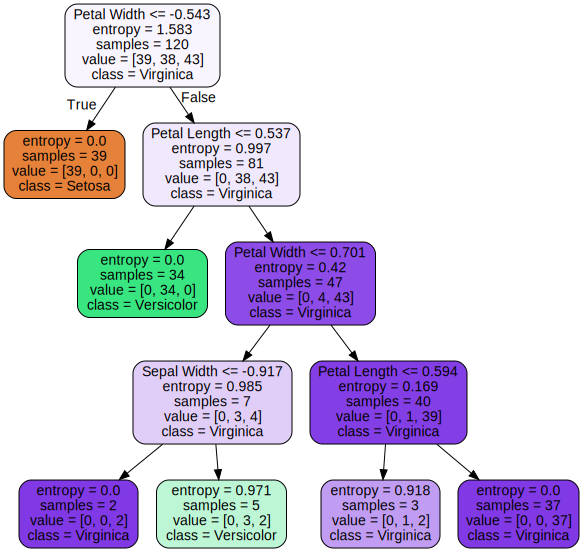

In [4]:
#We draw a picture of our decision tree 
#You'll need graphviz and IPython packages. go to Anaconda Navigator->Environments, select all libraries and search for python-graphviz, load and restart Jupyter.


from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = export_graphviz(classifier, filled=True, rounded=True,
    class_names=['Setosa', 'Versicolor','Virginica'],
    feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
    out_file=None
)

graph = Source(graph)
SVG(graph.pipe(format='svg'))

## Decision Tree Regression

Decision Trees Regression follows same logic with classification. But this time we need a different impurity measure suitable for continous problems; weighted mean squared error (MSE):

$$MSE(t)=\frac{1}{N_t}\sum_{i\in D_t} (y^{(i)}-\hat y_t) $$

Here, $N_t$ is the number of training samples at node t, $D_t$ is the training subset at node t, $y^{(i)}$ is the true target value, and $\hat y_t$ is the predicted target value (sample mean):

$$\hat y_t=\frac{1}{N_t}\sum_{i\in D_t} y^{(i)} $$

In [5]:
#We use Boston dataset
boston = datasets.load_boston()          
df = pd.DataFrame(boston.data[:, 12])     
df.columns = ['LSTAT']
df['MEDV'] = boston.target                 
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [6]:

from sklearn.tree import DecisionTreeRegressor    

X = df[['LSTAT']].values                          
y = df['MEDV'].values                             #We use only two of the features for visual demonstration later 

sort_idx = X.flatten().argsort()                  # Sort X and y by ascending values of X
X = X[sort_idx]
y = y[sort_idx]

tree = DecisionTreeRegressor(criterion='mse',     # Initialize and fit regressor
                             max_depth=3)         
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

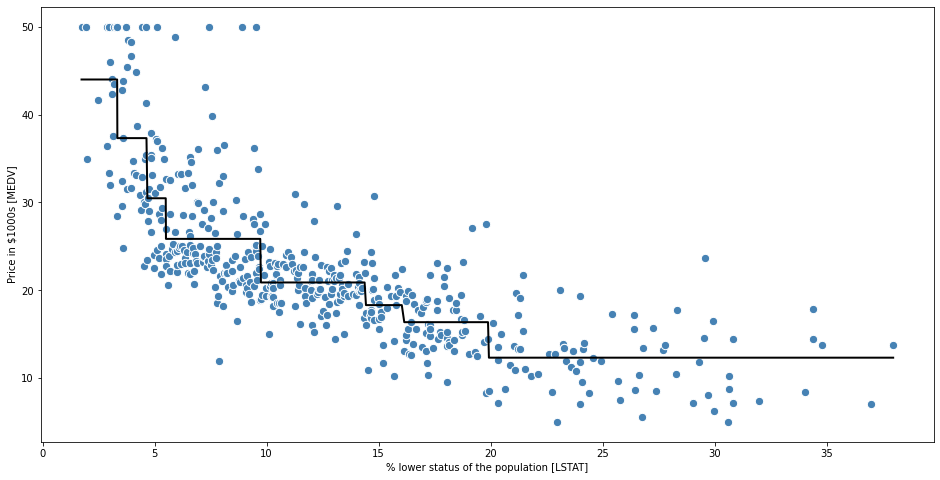

In [25]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                  # Plot actual target against features
            edgecolor='white', s=70)
plt.plot(X, tree.predict(X),                      # Plot predicted target against features
         color='black', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

## Random Forest Classification

Sometimes Decision Trees can be less accurate than other available methods and be instable i.e may change a lot when we add more data in training. We overcome these obstacles by generating many trees and choose the most popular result. (or avarage of results in case of regression.). Unfortunately resulting process is usually much less interpretable compare to a single tree.

In [7]:
from sklearn.ensemble import RandomForestClassifier #Import Random Forest Model

rfc=RandomForestClassifier(n_estimators=100, random_state=1) #How many trees are used. Check other parameters

rfc.fit(x_train,y_train)

print("Test Accuracy: ", rfc.score(x_test,y_test))

Test Accuracy:  0.9333333333333333


Random forest classifier can also determine how important a feature for prediction. So, we can eliminate less important feauters from prediction process and reduce dimension.    

In [8]:
feature_imp = pd.Series(rfc.feature_importances_,index=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']).sort_values(ascending=False)
print(feature_imp)
#Below we have feature Importance scores

Petal Length    0.460741
Petal Width     0.386354
Sepal Length    0.125738
Sepal Width     0.027167
dtype: float64


In [9]:
# Remove feature 'Sepal Width'
x=IrisData[['Sepal Length', 'Petal Length', 'Petal Width']]  
y=IrisData['Class']                                       


x = IrisData.iloc[:,:-1].values
y = IrisData.iloc[:, -1].values
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
#We train again with new data
rfc.fit(x_train,y_train)

print("Test Accuracy: ", rfc.score(x_test,y_test))

Test Accuracy:  0.9


### Bootstrap Aggregation (Bagging)

Bagging, also known as Bootstrap Aggregation is the ensemble technique used by random forest. Bagging chooses a random sample from the data set. Hence each model is generated from the samples (Bootstrap Samples) provided by the Original Data with replacement known as row sampling. This step of row sampling with replacement is called bootstrap. Now each model is trained independently which generates results. The final output is based on majority voting after combining the results of all models. This step which involves combining all the results and generating output based on majority voting is known as aggregation.

RandomForestClassifier has parameter bootstrap whose default value is True. 

## <font color=red>**Exercise**</font> 

What is out-of-bag score? How it is related to boostrap?<br>
Find OOB score of above estimation.(check oob_score parameter of RandomForestClassifier)

## Random Forest Regression 

As we see Decision trees do not perform well with continous problem unless we increase depth of the tree by taking risk of overfittin. Fortunetly, averaging many trees with Random Forest Regression improve results drasticaly. 

## <font color=red>**Exercise**</font> 

Predict 'MEDV' by using Random Forest Regression(use sklearn.ensemble.RandomForestRegressor) in Boston dataset.

Try different; 

Set of Features(Feature importance) <br>
Number of estimators <br>
Max tree depth <br>

And compare results.<br>

Optinal: Try to find optimum number of estimators. <br>
Optinol: Try to decide removing which tables actually improve the model.(You can add a randomly generated column and compare which features actually are less important that it ) 